## 1. Pollutant Mean (Solution Code)

In [1]:
library(plyr)

pollutantmean <- function(directory, pollutant, id = 1:332) {
    csv_files <- list.files(path = directory)[id]
    csv_read <- vector(mode = "list")

    for (csv_file in csv_files) {
       csv_read <- append(csv_read, list(read.csv(paste(directory, "/", csv_file, sep=""))))
    }

    csv_cumulative <- rbind.fill(csv_read)

    mean(csv_cumulative[, pollutant], na.rm = TRUE)
}

Warning message:
"package 'plyr' was built under R version 4.1.1"


### Test Cases

In [2]:
pollutantmean("specdata", "sulfate", 1:10)

[1] 4.064128

In [3]:
pollutantmean("specdata", "nitrate", 70:72)

[1] 1.706047

In [4]:
pollutantmean("specdata", "nitrate", 23)

[1] 1.280833

## 2. Complete (Solution Code)

In [5]:
complete <- function(directory, id = 1:332) {
    csv_files <- list.files(path = directory)[1:332]
    csv_cumulative <- c()

    for (csv_idx in id) {
       csv_clean <- na.omit(read.csv(paste(directory, "/", csv_files[csv_idx], sep="")))
       csv_cumulative[csv_idx] <- nrow(csv_clean)
    }

    clean_data <- data.frame(id = id, nobs = na.omit(csv_cumulative))
    clean_data
}

### Test Cases

In [6]:
complete("specdata", 1)

id,nobs
<dbl>,<int>
1,117


In [7]:
complete("specdata", c(2, 4, 8, 10, 12))

id,nobs
<dbl>,<int>
2,1041
4,474
8,192
10,148
12,96


In [8]:
complete("specdata", 30:25)

id,nobs
<int>,<int>
30,463
29,586
28,338
27,475
26,711
25,932


In [9]:
complete("specdata", 3)

id,nobs
<dbl>,<int>
3,243


## 3. Correlation (Solution Code)

In [10]:
corr <- function(directory, threshold = 0) {
    csv_files <- list.files(path = directory)[1:332]
    csv_correlations <- vector(mode = "numeric")

    for (csv_file in csv_files) {
        csv_clean <- na.omit(read.csv(paste(directory, "/", csv_file, sep="")))

        if(nrow(csv_clean) > threshold) {
            csv_correlation <- cor(csv_clean[, "sulfate"], csv_clean[, "nitrate"])
            csv_correlations <- append(csv_correlations, csv_correlation)
        }
    }

    csv_correlations
}

### Test Cases

In [11]:
cr <- corr("specdata", 150)
head(cr); summary(cr)

[1] -0.01895754 -0.14051254 -0.04389737 -0.06815956 -0.12350667 -0.07588814

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.21057 -0.04999  0.09463  0.12525  0.26844  0.76313 

In [12]:
cr <- corr("specdata", 400)
head(cr); summary(cr)

[1] -0.01895754 -0.04389737 -0.06815956 -0.07588814  0.76312884 -0.15782860

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.17623 -0.03109  0.10021  0.13969  0.26849  0.76313 

In [13]:
cr <- corr("specdata", 5000)
head(cr); summary(cr); length(cr)

numeric(0)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] 0

In [14]:
cr <- corr("specdata")
head(cr); summary(cr); length(cr)

[1] -0.22255256 -0.01895754 -0.14051254 -0.04389737 -0.06815956 -0.12350667

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.00000 -0.05282  0.10718  0.13684  0.27831  1.00000 

[1] 323

## 4. Hospital 30-Day Mortality Rates (Heart Attack)<br>(Solution Code)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


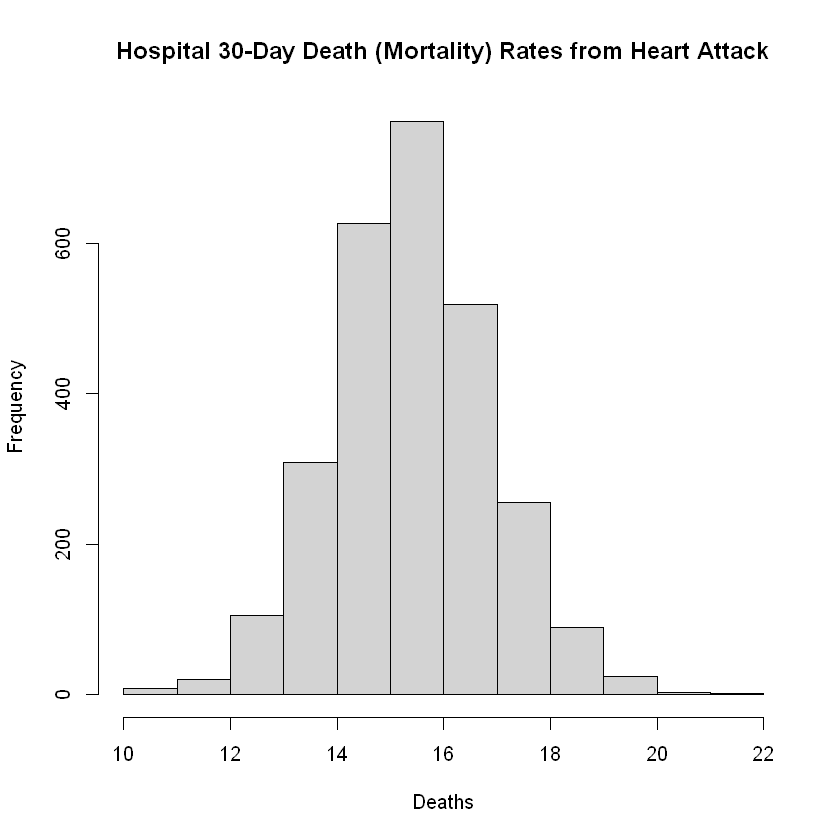

In [15]:
outcome <- read.csv('ProgHospData/outcome-of-care-measures.csv', colClasses = "character")
outcome[, 11] <- as.numeric(outcome[, 11])

hist(outcome[, 11], xlab="Deaths", main="Hospital 30-Day Death (Mortality) Rates from Heart Attack")